In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Data=pd.read_csv('/content/advertising.csv')
Data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
df=pd.DataFrame(Data)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**Data Analysis using pairplot**

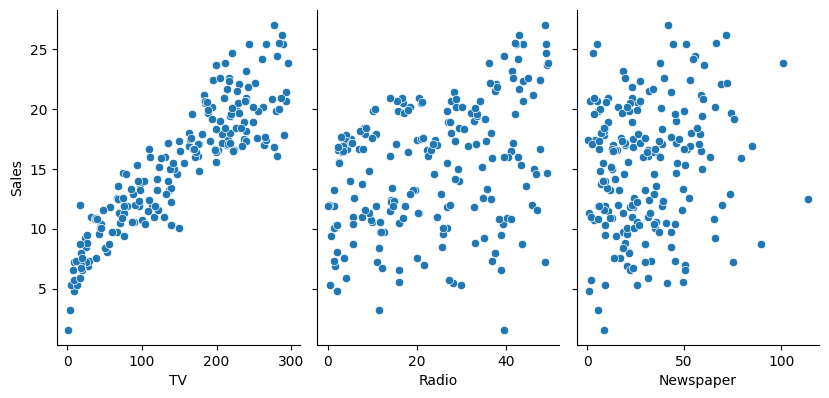

In [11]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

**Linear regression model for sales prediction**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

**Train, Test splitting of the data**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [19]:
accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

In [21]:
print(f'Accuracy: {accuracy*100}%')

Accuracy: 90.59011844150827%


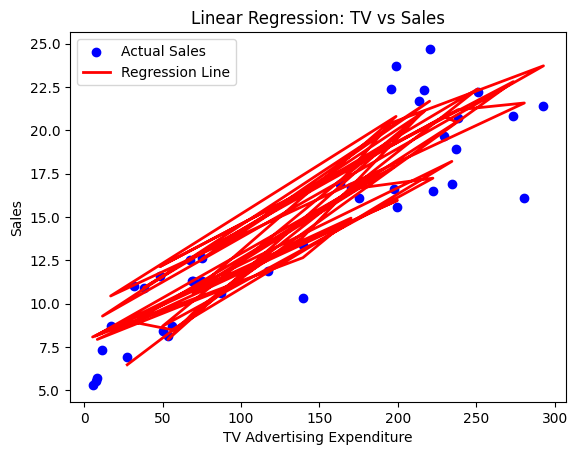

In [22]:
plt.scatter(X_test['TV'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test['TV'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs Sales')
plt.legend()
plt.show()


**Calculation of evaluation metrics**

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


**Test the model on a sample data**

In [28]:
new_data = {'TV':[100],
             'Radio':[20],
             'Newspaper':[30]
}
new_data_df = pd.DataFrame(new_data)
predictions = model.predict(new_data_df)
print("Predicted Sales for New Data:")
print(predictions)

Predicted Sales for New Data:
[12.31406014]
